Размещение нейросети на сервере Heroku

Необходимо подготовить нейронную сеть для распознавания MNIST, загрузить на Heroku и запустить веб сервис:

* Подготовить модель для распознавания MNIST
* Подключить Git
* Подключить Heroku
* Загрузить модуль на Heroku и проверить работу веб-сервиса

In [ ]:
# Загружаем базу mnist
from tensorflow.keras.datasets import mnist 

# Сеть прямого распространения
from tensorflow.keras.models import Sequential 

# Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta 

# Используем для to_categorical
from tensorflow.keras import utils 

# Для отрисовки изображений
from tensorflow.keras.preprocessing import image 

# Для загрузки своей картинки
from google.colab import files 

# Библиотека работы с массивами
import numpy as np 

# Для отрисовки графиков
import matplotlib.pyplot as plt 

# Для отрисовки изображений
from PIL import Image 

# Для генерации случайных чисел 
import random 

# Для округления
import math 

#Для работы с файлами 
import os 

# подключем диск
from google.colab import drive

%matplotlib inline

## Распознавание изображений из набора данных MNIST 


**Подготовка данных**


In [ ]:
# Загружаем MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

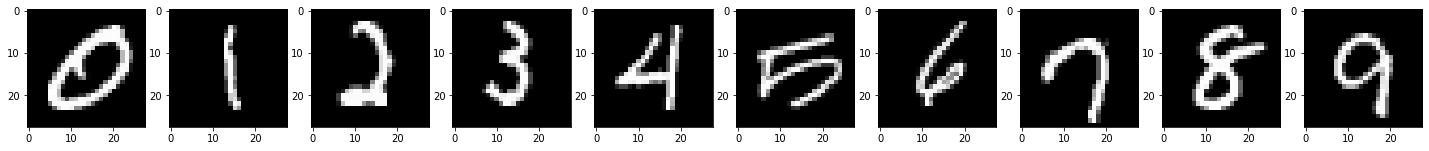

In [ ]:
# Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) # Создаем полотно из 10 графиков

for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') #Отображаем изображение i-ым графиков

plt.show() # Показываем изображения

In [ ]:
# Превращаем y_train и y_test сетей в формат one hot encoding

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# Меняем формат данных MNIST
# Надо добавить в конце размерность 1
# Чтобы свёрточная сеть понимала, что это чёрно-белые данные

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
# Посмотрим форматы выборок перед обучением

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


**Нейронная сеть**

In [ ]:
# задаём batch_size
batch_size = 128 

# Создаем последовательную модель

model = Sequential()

model.add(BatchNormalization(input_shape=(28, 28, 1))) # Слой пакетной нормализации
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # Первый сверточный слой
model.add(Conv2D(16, (3, 3), padding='same', activation='relu')) # Второй сверточный слой
model.add(MaxPooling2D(pool_size=(2, 2))) # Первый слой подвыборки

model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Flatten())

model.add(Dense(256, activation='relu')) # Полносвязный слой для классификации
model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Dense(10, activation='softmax')) # Выходной полносвязный слой

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

Epoch 1/15
469/469 [==============================] - 109s 231ms/step - loss: 0.1863 - accuracy: 0.9419 - val_loss: 0.0489 - val_accuracy: 0.9835
Epoch 2/15
469/469 [==============================] - 108s 231ms/step - loss: 0.0599 - accuracy: 0.9813 - val_loss: 0.0372 - val_accuracy: 0.9882
Epoch 3/15
469/469 [==============================] - 108s 230ms/step - loss: 0.0433 - accuracy: 0.9868 - val_loss: 0.0308 - val_accuracy: 0.9899
Epoch 4/15
469/469 [==============================] - 109s 232ms/step - loss: 0.0323 - accuracy: 0.9895 - val_loss: 0.0256 - val_accuracy: 0.9915
Epoch 5/15
469/469 [==============================] - 109s 232ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0260 - val_accuracy: 0.9914
Epoch 6/15
469/469 [==============================] - 108s 231ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0321 - val_accuracy: 0.9892
Epoch 7/15
469/469 [==============================] - 108s 231ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.0321 -

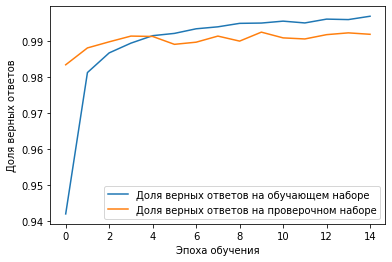

In [ ]:
# Обучаем сеть на данных mnist

history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Отображаем график точности обучения

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
!ls /content/drive/MyDrive/

'Colab Notebooks'   Untitled   'Новая таблица.gsheet'
 NN		    Маяк.gdoc  'статистика renko.gsheet'


In [ ]:
# Пересохранение обученной модели полностью (веса и архитектура)
model.save('/content/drive/MyDrive/NN/model_fmr_all.h5')

In [ ]:
model.save('model_fmr_all.h5')

In [ ]:
import keras
model=keras.models.load_model('/content/drive/MyDrive/NN/model_fmr_all.h5')

In [ ]:
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

In [ ]:
!unzip -q ngrok-stable-linux-amd64.zip

replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
get_ipython().system_raw('./ngrok authtoken 229GqjwmqhTmvFphdOPLmXhw3th_5UWBz4AqyVQW2r7D9nGNW')

In [ ]:
def get_link():
    get_ipython().system_raw('./ngrok http 8501 &')
    !curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Ссылка для streamlit: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

In [ ]:
!pip -q install streamlit

In [ ]:
get_link()

Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


In [ ]:
segment_file = '''

from tensorflow.keras.models import load_model
MODEL_NAME =   'model_fmr_all.h5'
import numpy as np
import streamlit as st
from PIL import Image 
model = load_model(MODEL_NAME)                                              # Загрузка весов модели
INPUT_SHAPE = (28, 28, 1)


def process(image_file):
    image = Image.open(image_file)  # Открытие обрабатываемого файла
    resized_image = image.resize((INPUT_SHAPE[1], INPUT_SHAPE[0]))          # Изменение размера изображения в соответствии со входом сети
    array = np.array(resized_image)[..., 0][np.newaxis, ...,np.newaxis]   # Регулировка формы тензора для подачи в сеть
    st.write(array.shape)

    prediction = np.argmax(model.predict(array))             # Запуск предсказания сети
    return resized_image, prediction
'''

with open('segment.py', 'w') as file:
    file.write(segment_file)

In [ ]:
    image = Image.open('/content/drive/MyDrive/NN/Pic1252.png')  # Открытие обрабатываемого файла
    resized_image = image.resize((28, 28))          # Изменение размера изображения в соответствии со входом сети
    array = np.array(resized_image)[..., 0][np.newaxis, ...]   # Регулировка формы тензора для подачи в сеть
    prediction = np.argmax(model.predict(array)[0])             # Запуск предсказания сети
    print((np.array(resized_image)[..., 0][np.newaxis, ...,np.newaxis] ).shape)
    print(model.predict(array)[0])
    print(prediction)

(1, 28, 28, 1)
[2.3793049e-01 1.8100006e-03 6.9719050e-03 5.0279981e-01 8.5208467e-06
 1.8849771e-01 4.3102950e-02 3.7382338e-03 1.0640181e-02 4.5002778e-03]
3


In [ ]:
app_file = '''

import streamlit as st
from PIL import Image 
from segment import process

st.title('Number recognition demo')

image_file = st.file_uploader('Load an image', type=['png', 'jpg'])  # Добавление загрузчика файлов

if not image_file is None:                                           # Выполнение блока, если загружено изображение
    col1, col2 = st.beta_columns(2)                                  # Создание 2 колонок
    image = Image.open(image_file)                                   # Открытие изображения
    resized_image,result = process(image_file)                                    # Обработка изображения с помощью функции, реализованной в другом файле
    col1.text('Source image')
    col1.image(resized_image)                                           # Вывод в первой колонке уменьшенного исходного изображения
    col2.text('Recognized number')
    col2.write(result)                                           # Вывод маски второй колонке
'''

with open('app.py', 'w') as file:
    file.write(app_file)

In [ ]:
setup_file = '''

mkdir -p ~/.streamlit/
echo "\
[server]\n\
headless = true\n\
port = $PORT\n\
enableCORS = false\n\
\n\
" > ~/.streamlit/config.toml

'''

with open('setup.sh', 'w') as file:
    file.write(setup_file)

In [ ]:
proc_file = 'web: sh setup.sh && streamlit run app.py'

with open('Procfile', 'w') as file:
    file.write(proc_file)

In [ ]:
requirements_file = '''

streamlit==0.82.0
tensorflow-cpu==2.5.0

'''

with open('requirements.txt', 'w') as file:
    file.write(requirements_file)

In [ ]:
!rm -rf sample_data

In [ ]:
def process(image_file):
    image = Image.open(image_file)  # Открытие обрабатываемого файла
    resized_image = image.resize((INPUT_SHAPE[1], INPUT_SHAPE[0]))          # Изменение размера изображения в соответствии со входом сети
    array = np.array(resized_image)[..., 0][np.newaxis, ...]   # Регулировка формы тензора для подачи в сеть
    prediction = np.argmax(model.predict(array))             # Запуск предсказания сети
    return prediction

In [ ]:
print(process(x_train[0]))

5


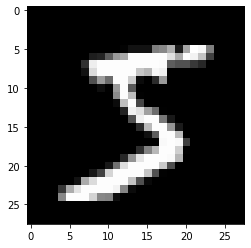

In [ ]:
plt.imshow(x_train[0].reshape(-1,x_train[0].shape[1]),cmap='gray')
plt.show()

In [ ]:
!git config --global user.email "zadrutskiy@yandex.ru"
!git config --global user.name "A1171"

In [ ]:
!curl https://cli-assets.heroku.com/install-ubuntu.sh | sh > /dev/null

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1232  100  1232    0     0  11622      0 --:--:-- --:--:-- --:--:-- 11622
+ dpkg -s apt-transport-https
+ echo deb https://cli-assets.heroku.com/apt ./
+ dpkg -s heroku-toolbelt
+ true
+ apt-key add -
+ curl https://cli-assets.heroku.com/apt/release.key
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5393  100  5393    0     0  94614      0 --:--:-- --:--:-- --:--:-- 94614
+ apt-get update
+ apt-get install -y heroku


In [ ]:
!heroku --version

heroku/7.59.2 linux-x64 node-v12.21.0


In [ ]:
LOGIN = 'zadrutskiy@zandex.ru'  # Укажите свой логин
API_KEY = '9c6fcbfb-acb2-46c6-924c-7d5079f78732'  # Укажите свой API-key

In [ ]:
auth_file = '''machine api.heroku.com
  login {login}
  password {password}
machine git.heroku.com
  login {login}
  password {password}
'''.format(login=LOGIN, password=API_KEY)

with open('/root/.netrc', 'w') as file:
    file.write(auth_file)

In [ ]:
!git init


Reinitialized existing Git repository in /content/.git/


In [ ]:
!git add model_fmr_all.h5
!git add segment.py
!git add app.py
!git add .config/
!git add ngrok
!git add sample_data/
!git add ngrok-stable-linux-amd64.zip
!git add ngrok-stable-linux-amd64.zip.1
!git add requirements.txt
!git add setup.sh
!git add Procfile

In [ ]:
!git add drive/

^C


In [ ]:
!git commit -m "My first commit3"

[master fd0d5d7] My first commit3
 2 files changed, 3 insertions(+), 3 deletions(-)


In [ ]:
!git status

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Procfile
	drive/

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!ls /content/sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
!git log

commit fd0d5d776f1b9e35e05baf7080c0955676135859 (HEAD -> master, heroku/master)
Author: A1171 <zadrutskiy@yandex.ru>
Date:   Wed Dec 15 16:56:39 2021 +0000

    My first commit3

commit 8b3a8da9218fa9c2693cf8c88216ab9ec6b480c9
Author: A1171 <zadrutskiy@yandex.ru>
Date:   Wed Dec 15 16:51:06 2021 +0000

    My first commit3

commit 4c1a5be3cd42b7561ee67e62495e1e77f433fcce
Author: A1171 <zadrutskiy@yandex.ru>
Date:   Wed Dec 15 16:45:24 2021 +0000

    My first commit3

commit b9ed8ec3bb1ffc9fa23552fd87c3865cc18a071e
Author: A1171 <zadrutskiy@yandex.ru>
Date:   Wed Dec 15 16:39:47 2021 +0000

    My first commit3

commit 9e156343a2a8492b1fa15cf6f81a7941026df6fb
Author: A1171 <zadrutskiy@yandex.ru>
Date:   Wed Dec 15 16:26:25 2021 +0000

    My first commit3

commit 844e33559565b02afec43f03ae9d904e9aa45c2c
Author: A1171 <zadrutskiy@yandex.ru>
Date:   Wed Dec 15 16:22:19 2021 +0000

    My first commit3

commit ef1963224fdb37fd272f28c99d2645787c462176
Author: A1171 <zadrutskiy@yandex.ru>
D

In [ ]:
!heroku create

Creating app... ⣾ 
⣽⣻⢿Creating app... !
 ▸    You've reached the app
 ▸    limit of 5 apps for
 ▸    unverified accounts.
 ▸    Delete some apps or add
 ▸    a credit card to verify
 ▸    your account.


In [ ]:
!git remote -v

heroku	https://git.heroku.com/vast-lowlands-85716.git (fetch)
heroku	https://git.heroku.com/vast-lowlands-85716.git (push)


In [ ]:
!git push heroku master

Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 409 bytes | 409.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Compressing source files... done.
remote: Building source:
remote: 
remote: -----> Building on the Heroku-20 stack
remote: -----> Using buildpack: heroku/python
remote: -----> Python app detected
remote: -----> No Python version was specified. Using the same version as the last build: python-3.9.9
remote:        To use a different version, see: https://devcenter.heroku.com/articles/python-runtimes
remote: -----> No change in requirements detected, installing from cache
remote: -----> Using cached install of python-3.9.9
remote: -----> Installing pip 21.3.1, setuptools 57.5.0 and wheel 0.37.0
remote: -----> Installing SQLite3
remote: -----> Installing requirements with pip
remote: -----> Discovering process types
remote:        Procfile declares types -> web
remote: 
remote: -

In [ ]:
!heroku ps:scale web=1

Scaling dynos... ⣾ 
⣽⣻Scaling dynos... !
 ▸    Couldn't find that
 ▸    process type (web).


In [ ]:
!heroku open

 ▸    Error opening web
 ▸    browser.
 ▸    Error: Exited with code
 ▸    3
 ▸    
 ▸    Manually visit
 ▸    https://vast-lowlands-85716.herokuapp.com/
 ▸    in your browser.


In [ ]:
get_link()

Ссылка для streamlit: http://39fc-34-70-65-100.ngrok.io


In [ ]:
!heroku ps

Free dyno hours quota remaining this month: 550h 0m (100%)
Free dyno usage for this app: 0h 0m (0%)
For more information on dyno sleeping and how to upgrade, see:
https://devcenter.heroku.com/articles/dyno-sleeping

=== web (Free): sh setup.sh && streamlit run app.py (1)
web.1: up 2021/12/15 16:59:19 +0000 (~ 4m ago)



In [ ]:
!heroku ps:scale web=1

Scaling dynos... ⣾ 
⣽⣻Scaling dynos... !
 ▸    Couldn't find that
 ▸    process type (web).


In [ ]:
!heroku logs

2021-12-15T16:54:08.826089+00:00 heroku[router]: at=info method=GET path="/" host=vast-lowlands-85716.herokuapp.com request_id=7e66f167-7ad1-4f0f-b363-63a332b597e5 fwd="92.127.96.55" dyno=web.1 connect=0ms service=4ms status=304 bytes=366 protocol=https
2021-12-15T16:54:09.044659+00:00 heroku[router]: at=info method=GET path="/static/css/5.cbc425bc.chunk.css" host=vast-lowlands-85716.herokuapp.com request_id=f20f8c9a-1c04-4e8f-964e-33527e7273d2 fwd="92.127.96.55" dyno=web.1 connect=0ms service=2ms status=304 bytes=364 protocol=https
2021-12-15T16:54:09.044875+00:00 heroku[router]: at=info method=GET path="/static/css/main.e190763c.chunk.css" host=vast-lowlands-85716.herokuapp.com request_id=15e91525-c767-46aa-9b76-71168a3a337f fwd="92.127.96.55" dyno=web.1 connect=0ms service=2ms status=304 bytes=364 protocol=https
2021-12-15T16:54:09.240204+00:00 heroku[router]: at=info method=GET path="/static/js/5.d3fb5f21.chunk.js" host=vast-lowlands-85716.herokuapp.com request_id=a3e4ff80-7e3b-414

In [ ]:
!heroku restart

Restarting dynos on ⬢ vast-lowlands-85716... ⣾ 
⣽⣻⢿Restarting dynos on ⬢ vast-lowlands-85716... done


In [ ]:
!python -V

Python 3.7.12
